In [ ]:
#                                              Image Classification Using Random Forest Classifier - Fashion-MINST Dataset

In [ ]:
#                                                         IMPORTING LIBRARIES AND LOADING FASHION-MINST DATASET

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, auc, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
#Loading fashion-MINST dataset using tensor flow and concatenating test and train data.
#So that we divide the entire dataset as train, validate and test datasets.
#import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
#                                            DATA PREPARATION (Cleaning & Normalization) AND TRANSFORMATION (Flattening) - Using Training Data

In [ ]:
#Data Preparation Step
#Data Cleansing - In this cell we are checking for missing values in image dataset and labels.
#fashion-MINST dataset from tensor flow is clean (As mentioned in https://github.com/zalandoresearch/fashion-mnist)
nan_fmn_images_train=np.isnan(train_images).sum()
nan_fmn_labels_train=np.isnan(train_labels).sum()

nan_fmn_images_test=np.isnan(test_images).sum()
nan_fmn_labels_test=np.isnan(test_labels).sum()

print("Number of missing values in Train image dataset : ", nan_fmn_images_train)
print("Number of missing labels : ", nan_fmn_labels_train)


print("Number of missing values in Test image dataset : ", nan_fmn_images_test)
print("Number of missing labels : ", nan_fmn_labels_test)

'''
We can see that the no datapoint in fashionMNIST is n/a or nan.
we are using fmn_images and fmn_labels instead of nan_fmn_images and nan_fmn_labels since we do not have any missing values.

'''

Number of missing values in Train image dataset :  0
Number of missing labels :  0
Number of missing values in Test image dataset :  0
Number of missing labels :  0


'\nWe can see that the no datapoint in fashionMNIST is n/a or nan.\nwe are using fmn_images and fmn_labels instead of nan_fmn_images and nan_fmn_labels since we do not have any missing values.\n\n'

In [ ]:
#Data Transformation - We will try classifying fashion-MINST dataset by normalizing the data and without normalizing the date and see if there is increase in accuracy.
#Some brief information about Normalising the images data  when RandomForestClassifier(which is a decision tree based model) is used for image classification:
    #Normalization is not mandatory since:
        #Random forests are less sensitive to the scale of input features because they make decisions based on relative feature importances rather than the absolute values of features.
        #The trees in a random forest split the data based on feature thresholds, and the order of magnitude of the features doesn't affect the splits - so we try to check accuracy without normalizing the data.
    #Normalizing can still be done to visualize data:
        #Normalizing data can help when we try to capture feature importance and to intrepret the model.
        #Normalization ensures that all features contribute equally to the distance measures used in splitting decisions. This can be useful when we try to intrepret the model.

#Which normalizing techniques can be used:
    # dividing by 255:
        #Images in Fashion-MINST dataset are 8 bit grey scale images. Each pixel in these images is represented by an 8-bit integer, which means each pixel can have values in the range [0, 255]
        #Since pixel values in typical images range from 0 to 255, dividing by 255 scales the values to the range [0, 1].
    # Using min-max scaling technique:
        #  Since we have image data, which is often represented as pixel values, a common approach is to scale the pixel values to the range [0, 1].
        #  It does not center the data around 0 or scale it to have a standard deviation of 1.
        #  So performing min-max scaling will be similar to dividing dataset by 255.
    # Why can we not use standard scalar or z-score normalization?
        # This is mostly used for normalizing numeric features and is not best option for image data.

fmn_images_scaled_train = train_images/255
fmn_images_scaled_test = test_images/255

In [ ]:
#Flattening the data: Transforming the data from 28*28 matrix to 784 columns dataset
#We are performing this transformation in order to visualize image data and perform some operations to interpret the data.

x_train_flatten = fmn_images_scaled_train.reshape(fmn_images_scaled_train.shape[0], -1)
x_test_flatten = fmn_images_scaled_test.reshape(fmn_images_scaled_test.shape[0], -1)

In [ ]:
#Converting the flattened dataset to pandas to perform varoius visulization activities

fmn_pd_df_train=pd.DataFrame(x_train_flatten)
label_df_train=pd.DataFrame(train_labels)

In [ ]:
#Using min-max scalar for normalization - checking if dividing by 255 and min-max scaler is same and gives same mean and std-deviation of image dataset.
#This basically requires flattening of data, so performing normalization after flattening.

# Create the scaler
scaler = MinMaxScaler()

train_images_data = train_images

# Fit the scaler on your data and transform it
X_normalized = scaler.fit_transform(train_images_data.reshape(train_images_data.shape[0], -1))

In [ ]:
#                                                                     Exploratory Data Analysis (EDA)

In [ ]:
# Exploratory Data Analysis (EDA)
#Firstly, we describe the images data and labels.

#Printing shapes of the data:
print("Train dataset images shape:", train_images.shape)
print("Train dataset labels shape:", train_labels.shape)
#Printing labels
print("Lables set : ", set(train_labels))

'''The given fashionMNIST dataset contains total 70000 images. TRain - 60,000 and Test - 10,000
Each fashion accessory is represented as 28*28 pixel greyscale image.

There are total 10 types of fashion accesory and they are represented as 0,1,2,3,4,5,6,7,8,9.

List of the classes is as follows(Information reference:Github):

0  T-shirt/top
1  Trouser
2  Pullover
3  Dress
4  Coat
5  Sandal
6  Shirt
7  Sneaker
8  Bag
9  Ankle boot '''

Train dataset images shape: (60000, 28, 28)
Train dataset labels shape: (60000,)
Lables set :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


'The given fashionMNIST dataset contains total 70000 images. TRain - 60,000 and Test - 10,000\nEach fashion accessory is represented as 28*28 pixel greyscale image.\n\nThere are total 10 types of fashion accesory and they are represented as 0,1,2,3,4,5,6,7,8,9.\n\nList of the classes is as follows(Information reference:Github):\n\n0  T-shirt/top\n1  Trouser\n2  Pullover\n3  Dress\n4  Coat\n5  Sandal\n6  Shirt\n7  Sneaker\n8  Bag\n9  Ankle boot '

In [ ]:
#Checking if dataset is balanced dataset.

# Check the distribution of samples in each class
class_distribution = np.bincount(train_labels)
num_classes = len(class_distribution)

# Display the distribution
for class_label, count in enumerate(class_distribution):
    print(f"Class {class_label}: {count} samples")

# Check if the dataset is perfectly balanced
perfectly_balanced = all(count == class_distribution[0] for count in class_distribution[1:])
if perfectly_balanced:
  print("Dataset is perfectly balanced")
else:
  print("Dataset is not perfectly balanced")

Class 0: 6000 samples
Class 1: 6000 samples
Class 2: 6000 samples
Class 3: 6000 samples
Class 4: 6000 samples
Class 5: 6000 samples
Class 6: 6000 samples
Class 7: 6000 samples
Class 8: 6000 samples
Class 9: 6000 samples
Dataset is perfectly balanced


'\nWe can observe that for each type of fashion accesory there are 6000 instances.\n'

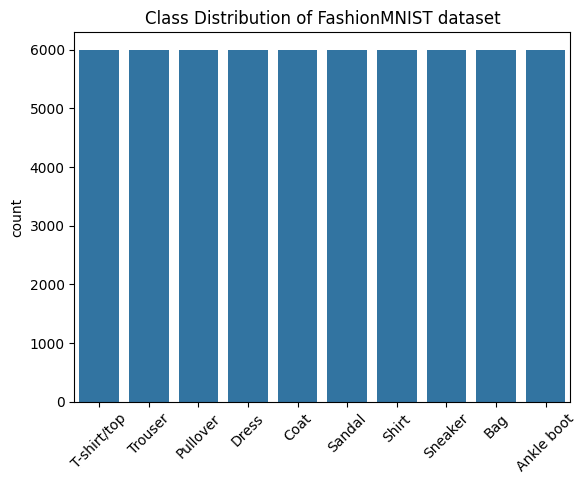

In [ ]:
#Plot class distributions in the fashion MNIST dataset

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# import seaborn as sns
# import matplotlib.pyplot as plt

sns.countplot(x=train_labels)
plt.xticks(np.arange(10), class_names, rotation=45)
plt.title("Class Distribution of FashionMNIST dataset")
plt.show

'''
We can observe that for each type of fashion accesory there are 6000 instances.
'''

In [ ]:
#                                                                      DATA VISUALIZATION

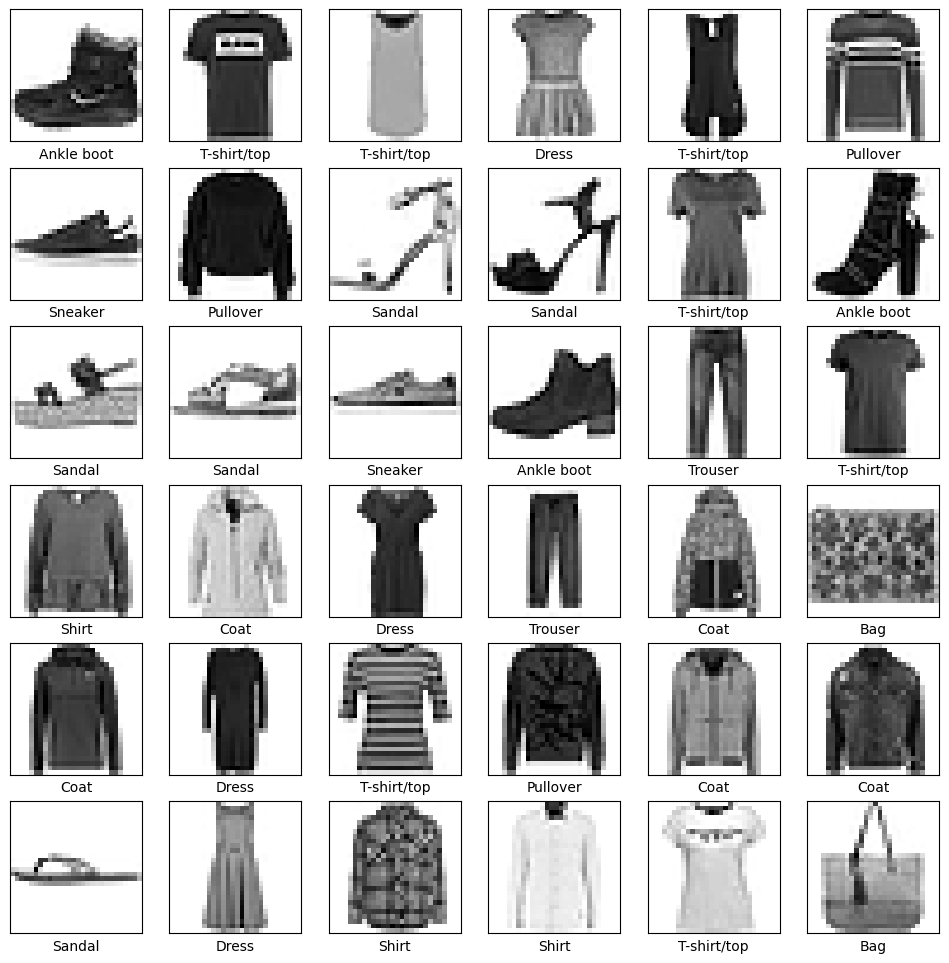

In [ ]:
#visualizing few images from the fashionMNIST dataset

plt.figure(figsize=(12,12))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fmn_images_scaled_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Printing covarience, eigen values and eigen vectors

#Covarience matrix:The covariance matrix provides information about the degree to which two features change together.
                  #A positive covariance indicates a positive relationship (as one variable increases, the other tends to increase),
                  #while a negative covariance indicates a negative relationship.
                  #The magnitude of the covariance indicates the strength of the relationship.
#Eigen Values:    Eigenvalues represent the amount of variance explained by each principal component.
                  #Higher eigenvalues correspond to principal components that capture more variance in the data.
                  #In the context of the covariance matrix, the sum of all eigenvalues is equal to the total variance of the dataset.
                  #The first few eigenvalues will dominate, indicating the most important directions of variance.
#Eigen vectors:   Eigenvectors represent the direction of maximum variance in the data. Each eigenvector corresponds to a principal component.

#Larger eigenvalues suggest that the corresponding principal components capture more information about the pixel intensity patterns in the images.
#The eigenvectors associated with larger eigenvalues represent the most significant directions of variability in the pixel intensities.


mnist_fashion_cov = np.cov(fmn_pd_df_train, rowvar = False)
eval, evect = np.linalg.eig(mnist_fashion_cov)

print("\nCovarience matrix : ", mnist_fashion_cov)
print("\nEigen values : ", eval)
print("\nEigen Vectors : ", evect)


Covarience matrix :  [[1.31736554e-07 1.14758391e-07 1.14459424e-07 ... 7.92262339e-08
  8.52732398e-08 9.62716545e-08]
 [1.14758391e-07 9.53749891e-07 1.65491957e-06 ... 2.39370959e-06
  1.03290380e-06 1.63889309e-07]
 [1.14459424e-07 1.65491957e-06 9.06761225e-06 ... 1.06742951e-05
  3.01881361e-06 5.96717771e-07]
 ...
 [7.92262339e-08 2.39370959e-06 1.06742951e-05 ... 4.58073189e-03
  1.57065665e-03 1.32960813e-04]
 [8.52732398e-08 1.03290380e-06 3.01881361e-06 ... 1.57065665e-03
  1.28283423e-03 1.46193336e-04]
 [9.62716545e-08 1.63889309e-07 5.96717771e-07 ... 1.32960813e-04
  1.46193336e-04 6.62678053e-05]]

Eigen values :  [1.98098057e+01 1.21122105e+01 4.10615661e+00 3.38182839e+00
 2.62477022e+00 2.36084678e+00 1.59744034e+00 1.29982360e+00
 9.20828072e-01 8.96558812e-01 6.77313601e-01 6.22998726e-01
 5.22403760e-01 4.50033978e-01 4.14659933e-01 4.02360864e-01
 3.76515209e-01 3.57800138e-01 3.12489521e-01 3.10740295e-01
 2.95847641e-01 2.77711294e-01 2.62471897e-01 2.54144872

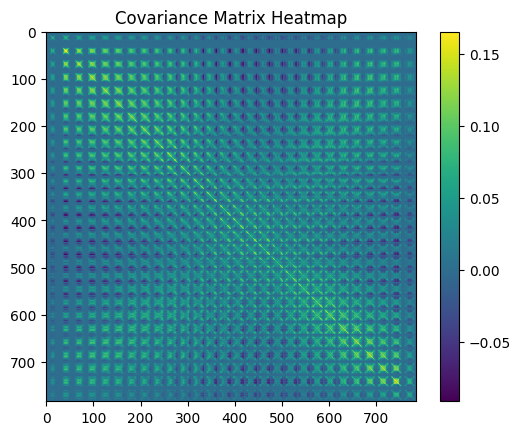

In [ ]:
#Plotting covarience matrix heat map
#heatmap can be interpretted as follows:
  # Bright Yellow/Red or Dark Blue: Indicates a strong positive or negative correlation, respectively.
  # Light Colors or Near-Zero Values: Suggest weak or no linear correlation.
  # Diagonal Elements: Represent the variance of individual features; brighter colors indicate higher variance.

plt.imshow(mnist_fashion_cov, cmap='viridis', interpolation='nearest')
plt.title('Covariance Matrix Heatmap')
plt.colorbar()
plt.show()


#From the below covarience heatmap, we can observe that most of the time we have light blue color between the features saying that they are negatively linearly related.
#We can also observe that few features are strongly negatively related with dark blue color and few features are in yellow indicating strong positive relation
#which means that as there is increase in these values other tend to increase as well.
#We are also seeing the yellow color in the diagonal of the heatmap, it indicates the covariance or correlation of each feature with itself in other words it represents the varince of individual features.
#Since the covariance of a variable with itself is its variance, these diagonal elements reflect the variance of each individual feature.
#The intensity of the color along the diagonal gives you an idea of how much each feature varies from its mean and since its yellow it means that features isgnificantly varies from its mean across the dataset.
#Since we are dealing with image dataset, where each feature represents a pixel, the diagonal elements provide information about how pixel intensities vary within the dataset.
#Bright yellow along the diagonal might suggest that certain pixels have a wide range of intensity values across the images.

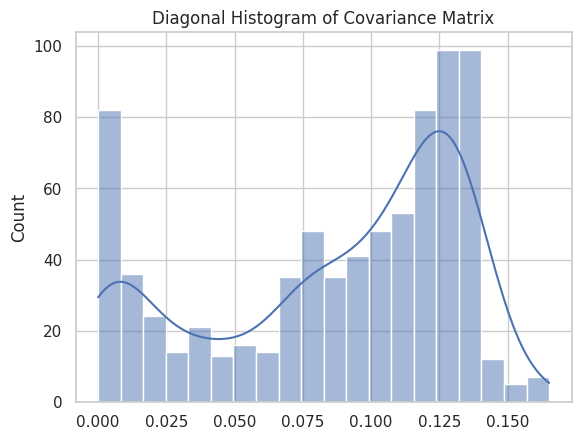

In [ ]:
#Histogram along the diagonal of covarience matrix to visualize the distribution of each feature - pixel intensity patterns for each feature (pixel).


#Histogram along the diagonal of covarience matrix provides insights into the univariate distribution of each feature in the Fashion-MNIST dataset.
#Each bar in the histogram represents the frequency or count of values within a certain range,
#reflecting the distribution of pixel intensities for a specific feature (pixel) across the entire dataset.
#The shape of each histogram indicates the distribution of pixel intensities for a particular feature. Here we have left-skewed/ negative-skewed which means that it indicates an asymmetry in the distribution
#This means that most pixel values are not clustered around a central value.

#Analysis from histogram of diagonal elements of covarience matrix:
#histogram is left skewed so data is not clustered around the center.
#The peak(s) in the histogram indicate the most common intensity level(s) for that pixel. This helps understand the typical appearance of that pixel in the images.
#pixel ranging between 0.125 and 0.15 can be found in most of the images and this way machine can learn the features.
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# Plot diagonal histograms using the diagonal of the covariance matrix
sns.set(style="whitegrid")

# Extract the diagonal of the covariance matrix for the histogram
diag_values = np.diag(mnist_fashion_cov)

# Plot diagonal histograms
sns.histplot(diag_values, kde=True, bins=20)
plt.title('Diagonal Histogram of Covariance Matrix')
plt.show()

In [ ]:
#Calculating correlation coefficient and matrix to check linearlity between features in dataset: Some features are linearly related and non-linear relationship also exists between features since we have image dataset.

# correlation_coefficient = fmn_pd_df_train.corr()
# print("Correlation matrix : ", correlation_coefficient)
# correlation_coefficient = fmn_pd_df_train.loc[0, 1]
# print("Correlation coefficient between 0 and 1 columns : ", correlation_coefficient)
# has_zero_values = np.any(correlation_coefficient == 0)
# print("Has Non-Linear relationship: ", has_zero_values)

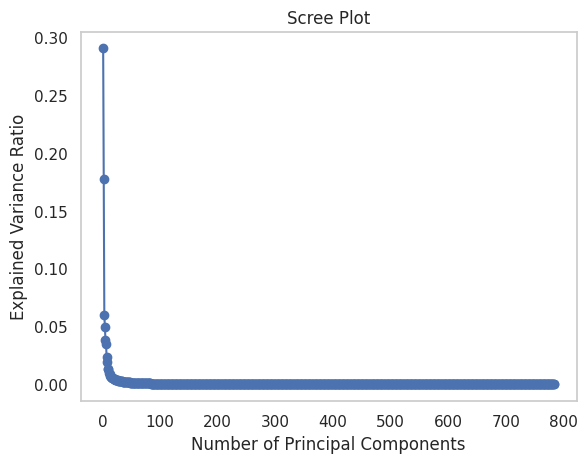

In [ ]:
#Since fashion-MINSt is image dataset, and each image has 784 features,if we say each feature is a dimension and lets say we have 784 dimensions which is a high dimensional data when we take 70,000 images into account.
#To visualize such high dimensional data and interpreting it would be difficult, so we use dimensionality reduction to interpret the dataset.
#PCA allows us to reduce the dimensionality while retaining most of the variability in the data.
#By selecting a subset of principal components, we can project the data into a lower-dimensional space, making it easier to visualize and interpret

#The major aim is to gain insights into the underlying structure and relationships between features of multiple images. Doing this using dimensionality reductions techniques such as PCA would be easier since,
#PCA is computationally efficient and PCA tends to emphasize the most significant patterns in the data and suppress noise or less significant variations.
#this can be done (which PCA does) identifies the directions (principal components) in which the data varies the most.
#When we visualize the data using a subset of these principal components, significant amount of the original variability is retained.
#This allows us to capture the essential patterns and structures in the data.

#Information regarding Scree plot:
  #X-axis: Principle components in decending order
  #Y-axis: Represents the eigenvalues of the principal components
  #Elbow point: This is a point where the slope of the curve sharply decreases.This point is often considered a cutoff for retaining principal components.
                #The number of principal components before the elbow is typically chosen as the dimensionality reduction.
  #Using this scree plot we can see how quickly the eigen values decreases.
  #A steep decline followed by a leveling off suggests that the initial principal components are more important in explaining the variance.



##############################################################################################################################################
#PCA, being a linear technique, may struggle to capture non-linear relationships
#and might not be as effective in revealing the underlying structure of fashion-MINST dataset,
#since fashion-MINST dataset is a image dataset and we have non-linear relationship between features as shown in heatmap of covarience matrix,
#So we also perform t-SNE technique (after PCA) since it can capture non-linear relationship between features.
################################################################################################################################################

#from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA to your data (which is normalized)
pca.fit(fmn_pd_df_train)

# Get the explained variance ratios
explained_var = pca.explained_variance_ratio_

# Create a scree plot
plt.plot(np.arange(1, len(explained_var) + 1), explained_var, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()

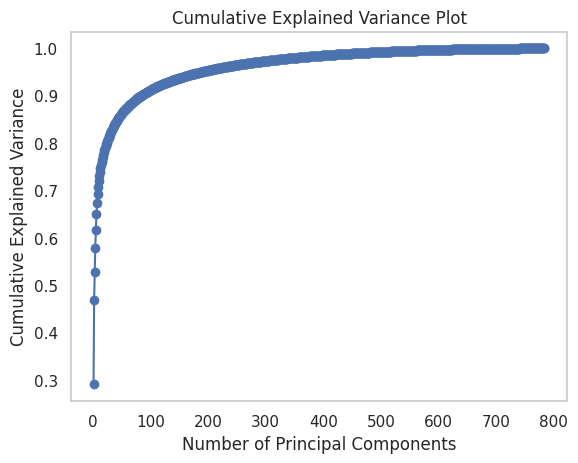

In [ ]:
#cumulative explained variance plot helps guide decisions about the number of principal components to retain
#ensuring a balance between dimensionality reduction and preserving a significant portion of the original data's variability.


# Calculate cumulative explained variance
cumulative_explained_var = np.cumsum(explained_var)

# Create a cumulative explained variance plot
plt.figure()
plt.plot(np.arange(1, len(explained_var) + 1), cumulative_explained_var, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()

# Display the plots
plt.show()

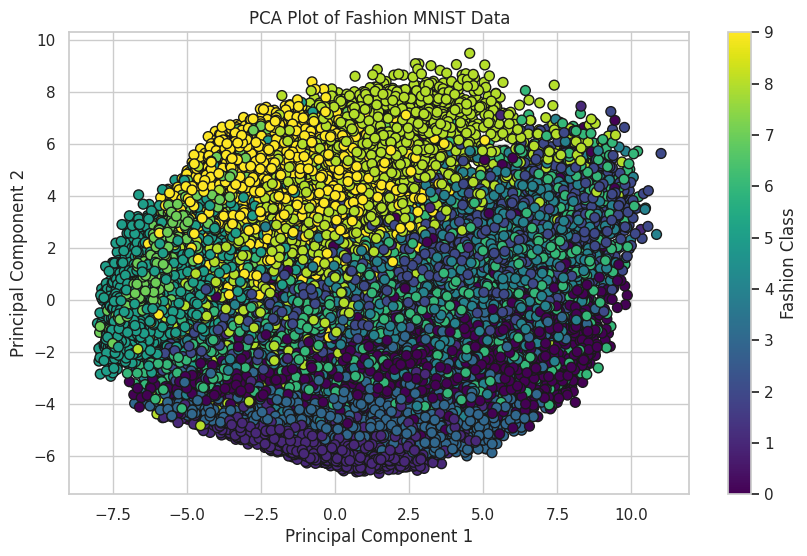

In [ ]:
# Plotting first 2 principle components.
# Each point in PCA represent an image in fashionMINST dataset.we have 2 axis here, x-axis represent 1st principle component which captures the most significant variation in the data.
# y-axis represent 2nd principle component, which is uncorrelated with first principle component.
# we also can see the clustering of the data where yellow points represent class 9 and blue points represent class 3
# we can see overlapping clusters which shows similar feature representations.
#Points that are more spread out along x-axis contribute more to the overall variance in the dataset

#from sklearn.decomposition import PCA
pca=PCA()
# Fit the PCA to your data
pca.fit(fmn_pd_df_train)

# Transform the data using the first two principal components
transformed_data = pca.transform(fmn_pd_df_train)[:, :2]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=label_df_train[0], cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Fashion Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Fashion MNIST Data')
plt.grid(True)
plt.show()

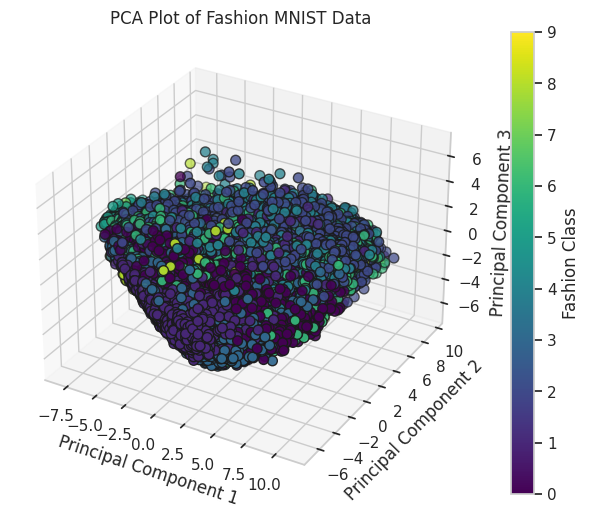

In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D



pca = PCA(n_components=3)  # Set the number of components to 3 for 3D visualization
transformed_data = pca.fit_transform(fmn_pd_df_train)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=label_df_train[0], cmap='viridis', edgecolor='k', s=50)

# Add labels and a colorbar
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Plot of Fashion MNIST Data')
fig.colorbar(scatter, label='Fashion Class')

plt.show()

In [ ]:
first_pc_loadings = pca.components_[0]
print(first_pc_loadings)
#pca.components_ gives us list of lists where each list or row is a principle component and values of each row are weights.These weights indicate the contribution of each pixel to that principal component.
print(len(pca.components_[0]))
# Find the indices of the top N pixels contributing the most to the variance
num_top_pixels = 10  # Adjust as needed
top_pixel_indices = np.abs(first_pc_loadings).argsort()[-num_top_pixels:][::-1]

print("Indices of top", num_top_pixels, "pixels contributing the most to variance:", top_pixel_indices)

[ 1.76521515e-07  2.44768364e-06  1.67354171e-05  6.63525771e-05
  1.51859209e-04  2.83234085e-04  4.96338224e-04  1.31995996e-03
  3.46590203e-03  7.77743636e-03  1.43788237e-02  2.10508241e-02
  2.60672938e-02  2.56127506e-02  2.52802903e-02  2.69476244e-02
  2.50452360e-02  1.78939752e-02  1.07691282e-02  5.04778015e-03
  1.99837870e-03  7.65776845e-04  3.16048759e-04  1.73069508e-04
  1.53215640e-04  8.22085156e-05  1.62152187e-05  5.34064065e-07
  4.27525591e-06  1.45817555e-05  5.68703292e-05  2.87179860e-04
  5.87576288e-04  1.52795296e-03  5.48575727e-03  1.36045481e-02
  2.46835889e-02  3.67604881e-02  4.65606201e-02  5.73411034e-02
  6.16755760e-02  5.77426564e-02  5.60117219e-02  6.05348837e-02
  6.09867954e-02  5.18579643e-02  4.17870713e-02  3.01756460e-02
  1.79899014e-02  8.00302966e-03  2.48548699e-03  8.21557174e-04
  6.06704161e-04  3.91792589e-04  1.31286750e-04  9.29480398e-06
  1.56638136e-05  5.40935351e-05  1.83722967e-04  5.79282489e-04
  1.57619444e-03  7.58182

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import seaborn as sns


# Create a t-SNE object with two components for 2D visualization
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_result = tsne.fit_transform(fmn_pd_df_train)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['Component 1', 'Component 2'])

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', data=tsne_df)
plt.title('t-SNE Visualization of Flattened Fashion MNIST Images')
plt.show()


In [ ]:
#Analysis from PCA and t-SNE dimensionality reduction techniques:
#Using PCA plot with the principal component 1 (PC1) on the x-axis and principal component 2 (PC2) on the y-axis, we can visualizing how the data points are distributed in the reduced-dimensional space defined by these two principal components.
#Observing the plot, we can see that the clusters(classes) are very close to each other and are being overlapped. i.e., the patterns captured by the principal components are not distinctive enough to separate the clusters
#Since PCA assumes linear relationship between features and image data is non-linear, PCA is not able to effictively separate the clusters.
#When we performed t-SNE technique and plotted first 2 principle components, we can see that clusters are separated and points belong to one cluster might share similar relationship between features.
#This is evident, since t-SNE does not assume linear relationship between features in dataset. So it can reveal complex relationship in dataset.
#t-SNE is also good at capturing local similarities and global structure of the data.
#The density of points in different regions of the t-SNE plot reflects the data density in the original space.
#Relative distances between clusters can provide insights into the relationships between different groups in the data.

In [ ]:
#                               Splitting Training Dataset into Training and Validation (Such that validation dataset has 10,000 samples)

In [ ]:
# #Splitting the training data into train and validation dataset

# The 'stratify' parameter ensures that the class distribution is similar in all sets
#We use our pandas dataframe applied on normalized and flattened dataset.
x_train, x_val, y_train, y_val = train_test_split(fmn_pd_df_train, train_labels, test_size=0.1666, random_state=42, stratify=train_labels)
# Print the shapes of the resulting datasets
print("Train set shapes:", x_train.shape, y_train.shape)
print("Validation set shapes:", x_val.shape, y_val.shape)

x_train_flatten = x_train
x_val_flatten = x_val

test_images_flatten = x_test_flatten
print("Test set shapes : ", test_images_flatten.shape, test_labels.shape)

# Model Selection - Decision Tree

In [ ]:
# Normalize and flatten the training data
train_images = train_images / 255.0
train_images = train_images.reshape(train_images.shape[0], -1)  # Flatten the images

# Perform PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
train_images_pca = pca.fit_transform(train_images)

# Split the data after PCA transformation
x_train, x_val, y_train, y_val = train_test_split(train_images_pca, train_labels, test_size=0.1666, random_state=42, stratify=train_labels)

# Train a Decision Tree Classifier

dt_classifier = DecisionTreeClassifier(random_state=42)
cross_val_scores_pca_dt = cross_val_score(dt_classifier, x_train, y_train, cv=3, scoring='accuracy', verbose=2)

print("Cross-Validation Scores on PCA-converted data:", cross_val_scores_pca_dt)
print("Average Accuracy on PCA-converted data:", np.mean(cross_val_scores_pca_dt))


In [ ]:
# Normalize and flatten the test data
test_images = test_images / 255.0
test_images = test_images.reshape(test_images.shape[0], -1)  # Flatten the images

# Transform the test data using the already-fitted PCA
test_images_pca = pca.transform(test_images)

# Fit the Decision Tree Classifier on the PCA-transformed training data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_images_pca, train_labels)

# Predict using the PCA-transformed test data
y_pred_pca = dt_classifier.predict(test_images_pca)

# Calculate and print the accuracy
accuracy_pca = accuracy_score(test_labels, y_pred_pca)
print(f"Accuracy on PCA-converted dataset: {accuracy_pca * 100:.2f}%")


In [ ]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model with training data
dt_classifier.fit(x_train_flatten, y_train)

# Predictions on the validation set
y_val_pred_dt = dt_classifier.predict(x_val_flatten)

# Evaluate parameters on the validation set
accuracy_val_dt = accuracy_score(y_val, y_val_pred_dt)
precision_val_dt = precision_score(y_val, y_val_pred_dt, average='weighted')
recall_val_dt = recall_score(y_val, y_val_pred_dt, average='weighted')
f1_val_dt = f1_score(y_val, y_val_pred_dt, average='weighted')
conf_matrix_val_dt = confusion_matrix(y_val, y_val_pred_dt)

# Print results for the validation dataset
print('Validation results evaluation for Decision Tree')
print(f"Accuracy: {accuracy_val_dt:.4f}")
print(f"Precision: {precision_val_dt:.4f}")
print(f"Recall: {recall_val_dt:.4f}")
print(f"F1 Score: {f1_val_dt:.4f}")
print("Confusion Matrix:")
print(conf_matrix_val_dt)

# Create a heatmap using seaborn for the Decision Tree's confusion matrix
sns.heatmap(conf_matrix_val_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Adjust the number of PCA components
pca = PCA(n_components=100)  # Specify the number of components for PCA

# Apply PCA to the training and validation datasets
X_train_pca = pca.fit_transform(x_train_flatten)
X_val_pca = pca.transform(x_val_flatten)
test_pca = pca.transform(test_images_flatten)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_pca, y_train)

# Predictions on the validation set
y_val_pred_dt = dt_classifier.predict(X_val_pca)

# Predictions on the test set
test_pred_dt = dt_classifier.predict(test_pca)

# Evaluate the accuracy on the validation set
accuracy_val_dt = accuracy_score(y_val, y_val_pred_dt)

# Evaluate the accuracy on the test set
accuracy_test_dt = accuracy_score(test_labels, test_pred_dt)

# Output the accuracies
print(f'Validation Accuracy (Decision Tree): {accuracy_val_dt:.4f}')
print(f'Test Accuracy (Decision Tree): {accuracy_test_dt:.4f}')

# Model Selection - KNN

In [ ]:
# KNN Cross Validation PCA
knn = KNeighborsClassifier(n_neighbors=5)

cross_val_scores_pca_knn = cross_val_score(knn, train_images_pca, train_labels, cv=3, scoring='accuracy', verbose = 2)

print("Cross-Validation Scores on PCA-converted data:", cross_val_scores_pca_knn)
print("Average Accuracy on PCA-converted data:", np.mean(cross_val_scores_pca_knn))

In [ ]:
knn.fit(train_images_pca, train_labels)
y_test_pred = knn.predict(test_images_pca)

accuracy_test = accuracy_score(test_labels, y_test_pred)
print(f"Accuracy on test set: {accuracy_test * 100:.2f}%")

In [ ]:
#                                                                         Model Selection - Random Forest

In [ ]:
# We have selected, Random Forest techinique which is a traditional Machine Learning(supervised learning and Ensemble Learning) technique to classify the images in fashion-MINST dataset.
# We have selected Random Forest technique for image classification due to following reasons:
    # Fashion-MINST is a moderate dataset(60,000 train and 10,000 test images).
        #Choosing Deep learning Models such as CNN might cause overfitting problems some times, when applied on moderate datasets.
    # So we started looking for ML algorithms which does generalize well on moderate datasets and which gives good interpretability.
        #we selected Random Forest since it provides feature importance scores,
        #which can be useful for understanding the contributions of different features (pixels) to the classification - For interpretability
    # Considering the training time, random forest technique is a reasonable technique to choose for moderate datasets since its convergence rate is faster compared to other models.
    # Random Forest has an ability to capture non-linear patterns, which is prime in image classification.
    # Random Forest is less prone to overfitting compared to a single decision tree, as it averages predictions over multiple trees.
        #This can be beneficial when working with image data, where overfitting is a common concern due to the high dimensionality of the feature space.
    # Random Forest is an ensemble learning method, meaning it combines multiple weak learners (decision trees) to create a stronger model.
        #In the context of image classification, combining the predictions of multiple trees can often lead to a more robust and accurate model.
    # Random Forest can be easily parallelized, which makes it computationally efficient. This can be advantage when computational resources are limited.
    #The ensemble of decision trees helps the model generalize well to different patterns and variations in the Fashion-MNIST images, making the algorithm more robust.

# Working of Random Forest Algorithm
    # - Random Forest is a decision tree based algorithm.
    # - The Random Forest algorithm builds a collection of decision trees during training and outputs the mode of the classes (classification)
              #of the individual trees for a given input
    #Steps - Training Phase
                # - Bootstrapped sampling : For each tree in the Random Forest, a bootstrapped sample is created by randomly selecting a subset of images with replacement from the training dataset.
                # - selecting random features : At each node of a decision tree, a random subset of features (pixels in the case of image data) is considered for determining the best split.
                                          #This introduces diversity among the trees and helps prevent overfitting.
                # - building decision trees: For each tree, the decision tree is constructed recursively.
                                      #At each node, a subset of features is considered, and the algorithm chooses the feature and threshold that best splits the data
                                      #based on a criterion such as Gini impurity.
                                      #This process is repeated until a stopping criterion is met, such as reaching a maximum depth
                                      #or having a minimum number of samples in a leaf node
                # Iterating above process until all tress are built: above steps are repeated to create a predefined number of decision trees in the Random Forest.
                                                                      #Each tree is constructed independently, resulting in a collection of diverse trees.
           #- Prediction Phase:
                # - For a new image in the test set, each tree in the Random Forest predicts the class.
                                #Since we are doing classification, the mode (most common prediction) or maximum votes of all tree predictions is taken as the final predicted class for the input image.

#HYPER-PARAMETERS FOR Random Forest classifier:

    # n_estimators : Number of trees in the forest, Increasing number of trees would increase computational cost but also would increase performance until saturated.
    # criterion : The function used to measure the quality of split. Gini Impurity, Entropy and loss log
    # max_depth : The maximum depth of each decision tree in the forest. Increasing the maximum depth can lead to a more complex model, which may lead to overfitting.
    # min_samples_split : The minimum number of samples required to split an internal node. Increasing this value can help prevent overfitting.
    # min_samples_leaf : The minimum number of samples required to be at a leaf node. This can be tuned to control overfitting.
    # max_features : Number of features to consider when looking for the best split.If "auto," it uses all features; if "sqrt," it uses the square root of the number of features; if "log2," it uses the base-2 logarithm of the number of features
    # bootstrap : Whether to use bootstrapped samples when building trees. By default it is set to True
    # random_state : Controls the randomization of the algorithm. If a fixed integer is provided, the algorithm will produce the same results each time it is run


In [ ]:
#                                                                         Model Building

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

#Fit the model with training data
rf_classifier.fit(x_train_flatten, y_train)

# Predictions on the validation set
y_val_pred = rf_classifier.predict(x_val_flatten)

# Evaluate parameters on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted')
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Print results for the validation dataset
print('validation results evaluation ')
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")
print("Confusion Matrix:")
print(conf_matrix_val)



import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



# Create a heatmap using seaborn
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()


In [ ]:
#                                                                         Model Interpretability

In [ ]:
# To understand how the randomforest classifier makes the predictions, we need to understand how ensemble learning works.
#Ensemble learning is a machine learning paradigm where multiple week learners are trained to solve the same problem, and their predictions are combined to produce a final output.
#Random Forest is a popular example of a bagging ensemble, where the base learners are decision trees.
#So the fundamental unit of producing predictions is decision tree.
#Bagging involves training multiple instances of the same model on different subsets of the training data, typically created by bootstrapping (sampling with replacement).
#Each model is trained independently, and their predictions are combined through averaging for regression incase of continous data or voting for classification for discrete data.

#So as part of the random forest classification, multitude of decision tress and constructed and outputs the mode of classes or maximum votes for a given input.
#In training phase, we have 3 steps:
  #- Bootstrap sampling : For each tree in the forest, a bootstrap sample is created by randomly selecting data points (same data point can be selected or may not be included at all) from the training dataset with replacement
  #- Selection of random features from bootstrapped samples: At each node of each decision tree, a random subset of features is considered for determining the best split.
     #The goal is to introduce diversity among the trees, making them less correlated and improving overall generalization.
  #- Decision Trees construction : A decision tree is grown for each bootstrapped sample. At each node, the algorithm selects the best feature and threshold for splitting the data based
                            #This process is repeated recursively until a stopping criterion is met, such as reaching a maximum depth or having a minimum number of samples in a leaf node.

# Above 3 steps are repeated until predefined number of decision trees are constructed. Most improtantly model learns various relationships between input data/features.

#How does randomforest capture non-linear relationship between features:
#Decision trees, the base learners in a Random Forest, are capable of creating non-linear decision boundaries.
#By combining many decision trees with different perspectives on the data, Random Forest can model intricate non-linear relationships between features and the target variable.
#and also at each split in a decision tree, a random subset of features is considered.
#This introduces an additional level of randomness and helps capture non-linear relationships by allowing different trees to focus on different features and interactions.
#randomforest is also good for outliera and noise in data since the majority voting of predictions from multiple trees provides a more stable and robust prediction, avoiding overfitting to noise in the dataset.


In [ ]:
#                                                                         Business Insights

In [ ]:
# High Accuracy and Robustness:

# Random Forest gives high accuracy for classification tasks since it can learn complex non-liear relationship between features and is very robust.
#It can effectively handle complex patterns and relationships in the image data,
#making it suitable for accurately categorizing different types of clothing items in the Fashion-MNIST dataset.
#The ensemble nature of Random Forest also contributes to its robustness, reducing the risk of overfitting.

# Interpretability and Feature Importance:

# Random Forest provides a measure of feature importance,indicating which pixels or features in the images contribute the most to the classification decisions.
#For a clothing company, understanding these important features can provide insights into the visual characteristics that distinguish one type of clothing from another.
#This interpretability is valuable for both model understanding and potential design improvements.

# Handling Various Clothing Styles:

# The Fashion-MNIST dataset contains images of diverse clothing styles, including dresses, shoes, bags, and more.
#Random Forest's ability to model non-linear relationships and capture complex interactions between pixels makes it well-suited for handling
#the variability in clothing styles within the dataset.

# Efficient Training and Prediction:

# Random Forest can be efficiently trained and parallelized, making it practical for handling large datasets like Fashion-MNIST.
#This efficiency is crucial for a clothing company that may have a substantial number of images to process.
#Additionally, the trained model can make predictions quickly, enabling timely decision-making.


# Potential for Real-Time Applications:

# Depending on the scale of the dataset and the chosen hyperparameters, a Random Forest model trained on the Fashion-MNIST dataset
#could potentially be deployed for real-time image classification applications.
#This could be useful in scenarios such as online shopping platforms or virtual fitting rooms where quick and accurate clothing categorization is essential.

# Versatility Across Product Categories:

# The versatility of Random Forest allows it to handle a wide range of product categories within the clothing industry.
#Whether it's classifying shoes, tops, or accessories, the same algorithm can be adapted to different categories with minimal modification.

# Adaptability:

# Depending on the clothing company's needs, Random Forest models can be updated incrementally as new data becomes available.
#This adaptability is beneficial for staying current with evolving fashion trends and expanding the model's knowledge over time.

In [ ]:
pca = PCA(n_components=100)  # Adjust the number of components as needed

X_train_pca = pca.fit_transform(x_train_flatten)

X_val_pca = pca.transform(x_val_flatten)

test_pca = pca.transform(test_images_flatten)

# Train a Random Forest Classifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_pca, y_train)

# Predictions on the validation set
y_val_pred = rf_classifier.predict(X_val_pca)

test_pred = rf_classifier.predict(test_pca)

accuracy_test = accuracy_score(test_labels, test_pred)

# Evaluate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {accuracy:.4f}')

print(f'Test Accuracy: {accuracy_test:.4f}')

# CNN Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.optimizers import SGD

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("x_val original shape", x_val.shape)
print("y_val original shape", y_val.shape)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train.reshape(-1, 28, 28, 1))

In [ ]:
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')

plt.tight_layout()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
x_val = x_val.reshape(x_val.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
x_val = x_val.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
print("Validation matrix shape", x_val.shape)

In [ ]:
X_train /= 255
X_test /= 255
x_val /= 255

In [ ]:
num_classes = 10 # There are 10 classes possible
Y_train = to_categorical(y_train, num_classes)
Y_val = to_categorical(y_val, num_classes)
Y_test = to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()  # Declare a Sequential model
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))  # Input layer with Conv2D
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Second Conv2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer

model.add(Flatten())  # Flatten the output of the Conv2D layers to connect to Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))  # Output layer with 10 classes

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
num_epoch = 10

history = model.fit(datagen.flow(X_train.reshape(-1, 28, 28, 1), Y_train, batch_size=128),
                    epochs=num_epoch,
                    verbose=1,
                    validation_data=(x_val.reshape(-1, 28, 28, 1), Y_val))

In [ ]:
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'validation'], loc='best')
plt.xticks(np.arange(0,num_epoch,5))
plt.show()

In [ ]:
plt.plot(range(1,1+len(history.history['loss'])), history.history['loss'])
plt.plot(range(1,1+len(history.history['val_loss'])), history.history['val_loss'])
plt.title('Model Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['train', 'validation'], loc='best')
plt.xticks(np.arange(0,num_epoch,5))
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))
y_pred = np.argmax(y_pred, axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
target_names = [class_labels_dict[x] for x in range(0,10)]
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_accuracy)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
matrix_df = pd.DataFrame(conf_mat, index=target_names, columns=target_names)
matrix_df.index.name = 'Actual'
matrix_df.columns.name = 'Predicted'

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
!pip install keras-tuner --upgrade

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout)
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model(hp):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='hyperparam_tuning'
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

callbacks = [early_stopping]

tuner.search(
    datagen.flow(X_train.reshape(-1, 28, 28, 1), Y_train, batch_size=128),
    epochs=num_epoch,
    validation_data=(x_val.reshape(-1, 28, 28, 1), Y_val),
    callbacks=callbacks
)

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
model = tuner.hypermodel.build(best_hps)

# Optionally, retrain the model
history = model.fit(
    datagen.flow(X_train.reshape(-1, 28, 28, 1), Y_train, batch_size=128),
    epochs=num_epoch,
    validation_data=(x_val.reshape(-1, 28, 28, 1), Y_val),
    callbacks=callbacks
)

test_loss, test_acc = model.evaluate(X_test.reshape(-1, 28, 28, 1), Y_test)
print('Test Accuracy:', test_acc)